## Session 15 Decision trees
> Reference:https://github.com/goodboychan/goodboychan.github.io/blob/master/_notebooks/2020-06-03-01-Decision-tree-for-classification.ipynb

In [1]:
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
# Cross valudation
from sklearn.model_selection import cross_validate
# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Decision tree for classification
- Classification-tree
    - Sequence of if-else questions about individual features
    - **Objective**: infer class labels
    - Able to caputre non-linear relationships between features and labels
    - Don't require feature scaling(e.g. Standardization)
- Decision Regions
    - Decision region: region in the feature space where all instances are assigned to one class label
    - Decision Boundary: surface separating different decision regions
![decision region](image/decision_boundary.png)

### Train your first classification tree
In this exercise you'll work with the **Wisconsin Breast Cancer Dataset** from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (```radius_mean```) and its mean number of concave points (```concave points_mean```).

Reference of dataset:

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Attribute Information:

-  ID number
-  Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Preprocess

In [2]:
# load in the data
cancer_dataset = pd.read_csv('./data/wbc.csv')

In [3]:
# display first 5 rows of the dataset
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Summary of available variables in the dataset and their data types
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**We notice that the label in this dadtaset has a data type as object. We will pay attention to that and do some transfermation when building the label array.**

In [5]:
# Statistical summary of the dataset
cancer_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# To plot the decision boundary in 2-d space, we will play with a toy example of 
# two features first
X_2d = cancer_dataset[['radius_mean', 'concave points_mean']]
# Try to add more features that will increase the predictivity of the model
# X = cancer_dataset[['radius_mean', 'concave points_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']]
y = cancer_dataset['diagnosis']
print("labels before transfermation: ", y)

labels before transfermation:  0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [7]:
# Transfer characters into binary number
y = y.map({'M':1, 'B':0})
print("labels after transfermation: ", y)

labels after transfermation:  0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


Milagnant:  212 , percentage:  0.37258347978910367
Benign:  357 , percentage:  0.6274165202108963
Total:  569


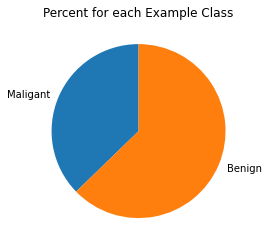

In [8]:
# Count the number of diseased examples
malignant = len(y[y == 1])
# Cound the number of not diseased examples
benign = len(y[y == 0])

# Print out the counts of each class
print("Milagnant: ", malignant, ", percentage: ", malignant/(malignant+benign))
print("Benign: ", benign, ", percentage: ", benign/(malignant+benign))
print("Total: ", str(malignant+benign))

# Make a Pie chart to represent how many example we have in each class
plt.pie([malignant, benign], labels=['Maligant', 'Benign'], startangle=90)
plt.title('Percent for each Example Class')
plt.show()

In [9]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=1)

**Hint**: 

- more information about DecisionTreeClassifier in scikit-learn: [(help)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- about scoring metrics: [(help)](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

**Notes**

The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to **fully grown and unpruned trees** which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.

**Parameters**

min_impurity_decreasefloat, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [43]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
decision_tree_model = DecisionTreeClassifier(max_depth=15, random_state=1, min_samples_leaf = 1, criterion = "entropy")
# decision_tree_model = DecisionTreeClassifier(max_depth=6, random_state=1, min_samples_leaf = 2, criterion = "gini")
# decision_tree_model = DecisionTreeClassifier(max_depth=, random_state=1, min_samples_leaf = , criterion = "entropy")

In [44]:
# K-fold cross validation
scoring = ["f1", "accuracy", "roc_auc"]
# Change X_2d to X if you add more features as input
scores = cross_validate(decision_tree_model, X_2d, y, cv=5, scoring = scoring)

In [45]:
# scores is a dictionary which follows the format {"key":item}
# key is the name for the item, item stores the value (can be a string or number)
# print(scores)
print(scores.keys())
print(scores.values())
# print(scores.items())

dict_keys(['fit_time', 'score_time', 'test_f1', 'test_accuracy', 'test_roc_auc'])
dict_values([array([0.02061582, 0.01262808, 0.01271415, 0.01112056, 0.01112509]), array([0.03176069, 0.02404928, 0.02418852, 0.01888204, 0.02006865]), array([0.79545455, 0.88095238, 0.84705882, 0.89156627, 0.83333333]), array([0.84210526, 0.9122807 , 0.88596491, 0.92105263, 0.87610619]), array([0.83655421, 0.90206354, 0.90046296, 0.91269841, 0.86737089])])


In [46]:
# extract information about average fit time, f1, test accuracy (validation accuracy)
# and roc_auc here
avg_fit_time = np.mean(scores["fit_time"])
std_fit_time = np.std(scores["fit_time"])

avg_test_f1 = np.mean(scores["test_f1"])
std_test_f1 = np.std(scores["test_f1"])

avg_test_accuracy = np.mean(scores["test_accuracy"])
std_test_accuracy = np.std(scores["test_accuracy"])

avg_test_roc_auc = np.mean(scores["test_roc_auc"])
std_test_roc_auc = np.std(scores["test_roc_auc"])    

In [47]:
print("avg_fit_time", avg_fit_time)
print("std_fit_time", std_fit_time)

print("avg_test_f1", avg_test_f1)
print("std_test_f1", std_test_f1)

print("avg_test_accuracy", avg_test_accuracy)
print("std_test_accuracy", std_test_accuracy)

print("avg_test_roc_auc", avg_test_roc_auc)
print("std_test_roc_auc", std_test_roc_auc)

avg_fit_time 0.013640737533569336
std_fit_time 0.003555715637028739
avg_test_f1 0.8496730696659824
std_test_f1 0.03448740282724168
avg_test_accuracy 0.8875019406924392
std_test_accuracy 0.028045390613029554
avg_test_roc_auc 0.8838300041419924
std_test_roc_auc 0.02810126506069637


In [48]:
# Fit dt to the training set
decision_tree_model.fit(X_train, y_train)

# Predict test set labels
y_pred = decision_tree_model.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 1]


### Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

In [49]:
# Predict test set labels
y_pred = decision_tree_model.predict(X_test)

In [50]:
# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.8f}".format(acc))
# Compute test set auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc_value = metrics.auc(fpr, tpr)
print("Test set auc: {:.8f}".format(auc_value))
# Compute test set f1 score
f1 = f1_score(y_test, y_pred)
print("Test set f1: {:.8f}".format(f1))

Test set accuracy: 0.90350877
Test set auc: 0.87896825
Test set f1: 0.85714286


Now, after k-fold cross validation, we can select a decision trees model with parameters that has the best performance among the ones you have testd. Let's build another logistic regression model following the codes in Tuesday's lab and make a comparison among those models.

### Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

#### Helper function

In [51]:
# To visualize model result in 2-d space using the following function,
# please make sure the input for X is two dimensial.
def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    # Organize plots in the output space
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    # i represent the index of the model list, 
    # model represent the model object
    for i, model in enumerate(models):
        # this is a build-in fuction to visualize the decision boundary of classification models
        # with 2 legends, ax specify the subfigure's location in the whole figure 
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        # Give a title to the plot by fitting in the model's name
        ax[i].set_title(model.__class__.__name__)
        # label the x_axis of the subplot
        ax[i].set_xlabel(X.columns[0])
        # We only want to set the label for y axis once 
        # the second plot will follow the scale of x axis/y aixs of the first plot
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    # display a tight layout
    plt.tight_layout()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

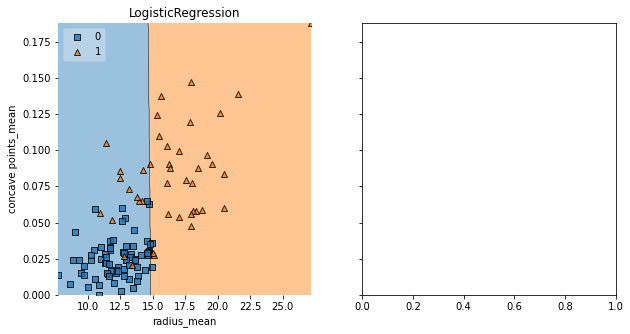

In [42]:

# Instantiate logistic regression
logistic_regression = LogisticRegression(random_state=1)

# Fit logistic regression to the training set
logistic_regression.fit(X_train, y_train)

# Define a list called model_list containing the two classifiers logreg and dt
# rename the model
model_list = [logistic_regression, decision_tree_model]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, model_list)